# Object-oriented programming

# The big reveal

So far we've been working with functions and packages of functions, as well as defining our own functions.  It turns out, though, that we've been working with objects all along, we just haven't recognize them as such. For example,

In [37]:
s = 'Hi'
s.lower()

'hi'

The string `s` is an object that we can send messages to.

In [38]:
print( type(s) )

<class 'str'>


A *class* is the blueprint for an object and is basically the name of the type, `str` in this case. An object is called an *instance* of the class.

In `s.lower()` we are sending the `lower` message to the `s` string object. Messages are really just functions associated with classes/objects.

In [39]:
s.lower

<function str.lower>

In a language that does not support object learning programming, we would do something like:

```python
lower(s)
```

Python has both functions and object reprogramming which is why there is both `s.lower()` and:

In [40]:
len(s)

2

The choice of function or "message" is up to the library designer.

In terms of implementation, however, `s.lower()` is actually implemented as `lower(s)`. Computer processors understand function calls; they do not understand objects and so we performed this translation within the Python interpreter itself.

# Package vs object members

Let's get another thing straight. The dot `.` operator is overloaded in Python to mean both package member and object member access.  You are familiar with this already:

In [41]:
import numpy as np
np.array([1,2,3])

array([1, 2, 3])

In [42]:
import math
math.log(3000)

8.006367567650246

This is a common point of confusion when reading code. When we see `a.f()`, we don't know whether that function `f` is a member of the package identified by `a` or an object referred to by `a`.

In the wordsim project, you defined a file called `wordsim.py` and then my `test_wordsim.py` file did `from wordsim import *` to pull in all your functions in `wordsim.py`.

# Fields versus methods

Objects have functions, which we call *methods* to distinguish them from functions not associated with objects. Objects also have variables, which we call *fields*.  

Fields are the *state* of the object.  Methods are the *behavior* of the object.

We've also been using fields all along, such as `df.columns` that gets the list of columns in a data frame.

In [43]:
import datetime
now = datetime.date.today()
print( type(now) )
print( now.year ) # access field year

<class 'datetime.date'>
2018


If you try to access an objects function without the parentheses, the expression evaluates to the function object itself instead of calling it:

In [44]:
s='hi'
s.title

<function str.title>

# A simple class definition

A class is a blueprint for multiple objects/instances.  The class *encapsulates* the state and behavior of an object.

The fields of an object are the data items we want to associate together. For example, if I want to track book titles/authors, I can use a list of tuples:

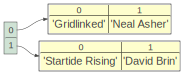

In [69]:
books = [
    ('Gridlinked', 'Neal Asher'),
    ('Startide Rising', 'David Brin')
]
objviz(books)

In [45]:
for b in books:
    print(f"{b[1]}: {b[0]}")

Neal Asher: Gridlinked
David Brin: Startide Rising


In [46]:
# Or, more fancy
for title, author in books:
    print(f"{author}: {title}")

Neal Asher: Gridlinked
David Brin: Startide Rising


To access the elements of the tuple in both cases, we have to keep track of the order in our heads. In other words, we have to access the tuple elements like they are list elements, which they are. A better way is to formally declare that author and title data elements should be encapsulated into a single entity called a book. Python has what I consider an extremely quirky specification but it is extremely flexible. Let's take a look at our first class definition that contains a function called a *constructor*.

In [47]:
class Book:
    def __init__(self, title, author):
        self.title = title
        self.author = author

The constructor typically sets initial and default field values based upon the arguments.

All methods, functions defined within an object, must have an explicit first argument called `self`.  This is the object under consideration.

Then we can make a list of book objects or instances of class `Book`:

In [48]:
books = [
    Book('Gridlinked', 'Neal Asher'),
    Book('Startide Rising', 'David Brin')
]

for b in books:
    print(f"{b.author}: {b.title}") # access fields

Neal Asher: Gridlinked
David Brin: Startide Rising


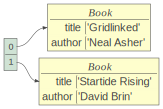

In [49]:
from lolviz import *

objviz(books)

Notice that we do not pass the `self` parameter to the constructor. **It's implicit at the call site but explicit at the definition site!**

# Defining methods

If you try to print out a book you will see just the type information and the physical memory address:

In [50]:
print(books[0])

In [68]:
class Book:
    def __init__(self, title, author):
        self.title = title
        self.author = author
        
    def __str__(self): # called when conversion to string needed like print
        return f"Book({self.title}, {self.author})"
    
    def __repr__(self): # called in interactive mode
        return self.__str__() # call the string
    
books = [
    Book('Gridlinked', 'Neal Asher'),
    Book('Startide Rising', 'David Brin')
]

In [52]:
print(books[0]) # calls __str__()
books[0]        # calls __repr__()

Book(Gridlinked, Neal Asher)


Book(Gridlinked, Neal Asher)

Let's create another method that sets the count of book sold.

In [53]:
class Book:
    def __init__(self, title, author):
        self.title = title
        self.author = author
        self.sold = 0 # set default
        
    def sell(self, n):
        self.sold += n
        
    def __str__(self): # called when conversion to string needed like print
        return f"Book({self.title}, {self.author}, sold={self.sold})"
    
    def __repr__(self): # called in interactive mode
        return self.__str__() # call the string

In [54]:
b = Book('Gridlinked', 'Neal Asher')
print(b)
b.sell(100)
print(b)

Book(Gridlinked, Neal Asher, sold=0)
Book(Gridlinked, Neal Asher, sold=100)


## The key to understanding methods versus functions

`b.sell(100)` is translated and executed by the Python interpreter as `sell(b,100)`. `b` becomes parameter `self` and so the `sell()` function is updating book `b`.

Instead of just functions, we send messages back and forth between objects. Instead of bark(dog) we say dog.bark() or instead of inflate(ball) we say ball.inflate().

## Exercise

Real-world objects contain ... and ...

A software object's state is stored in ...

A software object's behavior is exposed through ...

A blueprint for a software object is called a ...

## Exercise

Define a class called `Point` that has a constructor taking x, y coordinates and make them fields of the class.

Define method `distance(q)` that takes a `Point` and returns the Euclidean distance (`np.linalg.norm()`) from `self` to `q`.

Test with

```
p = Point(3,4)
q = Point(5,6)
print(p.distance(q))
```

Add method `__str__` so that `print(q)` prints something nice like `(3,4)`.

### Solution

In [55]:
import numpy as np

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def distance(self, other):
        return np.sqrt( (self.x - other.x)**2 + (self.y - other.y)**2 )
    
    def __str__(self):
        return f"({self.x},{self.y})"

In [56]:
p = Point(3,4)
q = Point(5,6)
print(p, q)
print(p.distance(q))

(3,4) (5,6)
2.8284271247461903


# Inheritance

Defining something new as it relates to something we already understand is usually a lot easier. The same thing is true in programming. Let's start with an account object:

In [57]:
class Account:
    def __init__(self, starting):
        self.balance = starting

    def add(self, value):
        self.balance += value

    def total(self):
        return self.balance

In [71]:
a = Account(100.0)
a.add(15)
a.total()

115.0

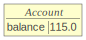

In [72]:
objviz(a)

We could define an interest-bearing account as it differs from a regular account:

In [59]:
class InterestingAccount(Account): # derive from super class to get subclass
    def __init__(self, starting, rate):
        self.balance = starting
        self.rate = rate
    def total(self): # OVERRIDE method
        return self.balance + self.balance * self.rate

In [60]:
b = InterestingAccount(100.0, 0.15)
b.add(15)
b.total()

132.25

The key is that it gets to use `add()` without having to redefine it and it also gets to override what the `total()` of the account is.  We have *reused* and *refined* previous functionality. 

We can also *extend* the functionality by adding a method that is not in the superclass.

In [61]:
class InterestingAccount(Account): # derive from super class to get subclass
    def __init__(self, starting, rate):
        self.balance = starting
        self.rate = rate

    def total(self): # OVERRIDE method
        return self.balance + self.balance * self.rate
    
    def profit(self):
        return self.balance * self.rate

In [62]:
b = InterestingAccount(100.0, 0.15)
b.add(15)
b.profit()

17.25

In [63]:
a = Account(100.0)
b = InterestingAccount(100.0, 0.15)
print(type(a))
print(type(b))

<class '__main__.Account'>
<class '__main__.InterestingAccount'>


In [64]:
print(b.__class__)
print(b.__class__.__base__)

<class '__main__.InterestingAccount'>
<class '__main__.Account'>


## Exercise

Define a `Point3D` that inherits from `Point`. 

Define constructor that takes x,y,z values and sets fields. Call `super().__init__(x,y)` to call constructor of superclass.

Define / override `distance(q)` so it works with 3D field values to return distance.

Test with

```
p = Point3D(3,4,9)
q = Point3D(5,6,10)
print(p.distance(q))
```

Add method `__str__` so that `print(q)` prints something nice like `(3,4,5)`.  Recall:


$dist(x,y) = \sqrt{(x_1-y_1)^2 + (x_2-y_2)^2 + (x_3-y_3)^2)}$


# A simple set implementation

In [65]:
class MySet:
    def __init__(self):
        self.elements = []
    def add(self, x):
        if x not in self.elements:
            self.elements.append(x)

In [73]:
s = MySet()
s.add(3)  # same as MySet.add(a,3)
s.add(3)
s.add(2)
s.add('cat')
s.elements

[3, 2, 'cat']

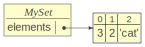

In [74]:
objviz(s)

# Linked lists -- the gateway drug

In [78]:
class LLNode:
    def __init__(self, value, next=None):
        self.value = value
        self.next = next

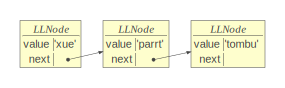

In [79]:
head = LLNode('tombu')
head = LLNode('parrt', head)
head = LLNode("xue", head)
objviz(head)

# Binary trees

In [91]:
class Tree:
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right       

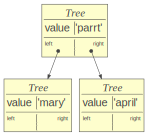

In [85]:
root = Tree('parrt')
root.left = Tree('mary')
root.right = Tree('april')
treeviz(root)

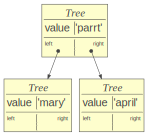

In [87]:
root = Tree('parrt', Tree('mary'), Tree('april'))
treeviz(root)

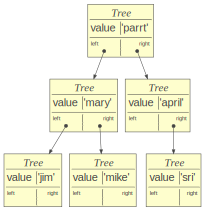

In [90]:
root = Tree('parrt')
mary = Tree('mary')
april = Tree('april')
jim = Tree('jim')
sri = Tree('sri')
mike = Tree('mike')

root.left = mary
root.right = april
mary.left = jim
mary.right = mike
april.right = sri

treeviz(root)

# Graphs

In [96]:
class GNode:
    def __init__(self, value):
        self.value = value
        self.edges = [] # outgoing edges
        
    def connect(self, other):
        self.edges.append(other)

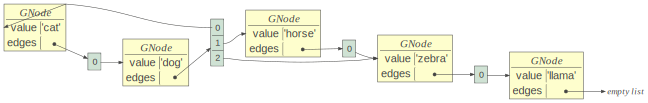

In [98]:
cat = GNode('cat')
dog = GNode('dog')
horse = GNode('horse')
zebra = GNode('zebra')
llama = GNode('llama')

cat.connect(dog)
dog.connect(cat)
dog.connect(horse)
dog.connect(zebra)
horse.connect(zebra)
zebra.connect(llama)

objviz(cat)

# Rationale and general thoughts

Because the mind of a hunter-gatherer views the world as a collection
of objects that interact by sending messages, an OO programming paradigm
maps well to the real world problems we try to simulate via computer.
Further, we are at our best when programming the way our minds are
hardwired to think.

In general when writing software, we try to map real-world entities onto programming constructs. If we take a word problem, the nouns typically become objects and the verbs typically become methods within these objects.

Because we can specify how differently-typed objects are similar,
we can define new objects as they differ from existing objects.
By correctly relating similar classes by their category/commonality/
similarity, code reuse occurs as a side-effect of inheritance.

Non-OO languages are inflexible/brittle because the exact type
of variables must be specified.  In OO languages, *polymorphism* is the ability to refer to groups of similar but different types using a single type reference.